In [1]:
# Test migration history reconstruction on Gundem et. al. Neuroblastoma data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)
from src.lib import vertex_labeling

from src.util import data_extraction_util as data_util
from src.util import pairtree_data_extraction_util as pt_util
from src.util import vertex_labeling_util as vert_util
from src.util.plotting_util import PrintConfig

import matplotlib
import torch

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3, 3]

GUNDEM_DATA_DIR = os.path.join(repo_dir, 'src/data/gundem_neuroblastoma_2023/cns_met_patient_driver_genes')
PAIRTREE_TREES_DIR = os.path.join(GUNDEM_DATA_DIR, 'pairtree_trees')
custom_colors = ["#6aa84fff","#c27ba0ff", "#e69138ff", "#be5742e1", "#2496c8ff", "#674ea7ff"]


14:46:35 INFO
NumExpr defaulting to 8 threads.
/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/util/plotting_util.py:425: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(candidates) == 1, f"{msg} root node detected")


CUDA GPU: False
CUDA GPU: False
CUDA GPU: False
CUDA GPU: False


In [2]:
def find_labeling(ref_var_fn, pairtree_results_fn, custom_colors, primary_site):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = data_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    data = pt_util.get_adj_matrices_from_pairtree_results(pairtree_results_fn)

    print(f"num trees: {len(data)}")
    for i, (adj_matrix, llh) in enumerate(data):
        print(f"TREE {i}, llh {llh}")
        T = torch.tensor(adj_matrix, dtype = torch.float32)
        B = vert_util.get_mutation_matrix_tensor(T)

        idx_to_label = {v:str(v) for k,v in cluster_label_to_idx.items()}
        print(idx_to_label)
        G = data_util.get_genetic_distance_tensor_from_adj_matrix(T, cluster_label_to_idx, "_")

        print(unique_sites)   
        primary_idx = unique_sites.index(primary_site)
        r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
        weights = vertex_labeling.Weights(data_fit=1.0, mig=10.0, comig=5.0, seed_site=1.0, reg=2.0, gen_dist=0.0)
        print_config = PrintConfig(visualize=True, verbose=True, viz_intermeds=False, k_best_trees=5)
        vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, G=G, ordered_sites=unique_sites, 
                                                    weights=weights, p=r, node_idx_to_label=idx_to_label, lr=0.1,
                                                    max_iter=200, batch_size=64, print_config=print_config,
                                                    custom_colors=custom_colors, primary=primary_site, 
                                                    weight_init_primary=True, lr_sched="step")


        

num trees: 12
TREE 0, llh -41.110498531982245
{2: '2', 0: '0', 1: '1', 3: '3'}
['retroperitoneal', 'lung', 'brain']


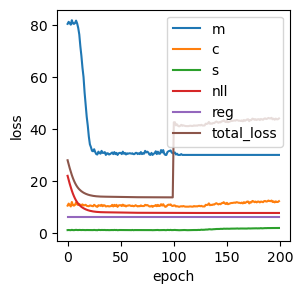

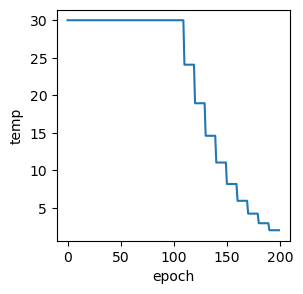

Time elapsed: 18.013116
**************************************** BEST TREE LABELING ****************************************

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 7.638
Reg: 3.000000238418579
Loss: 54.638
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
"1_brain" [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label=""

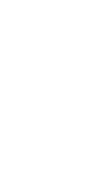

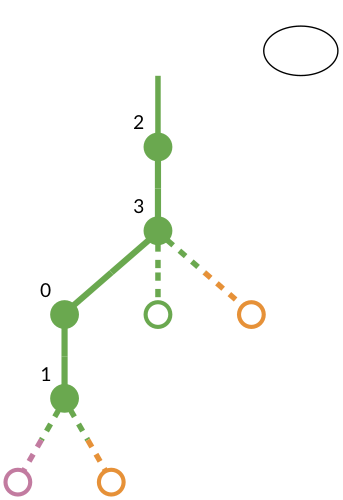

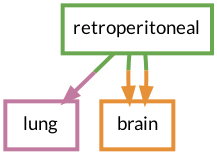

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 7.628
Reg: 3.0
Loss: 55.628
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
"1_brain" [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=soli

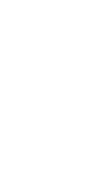

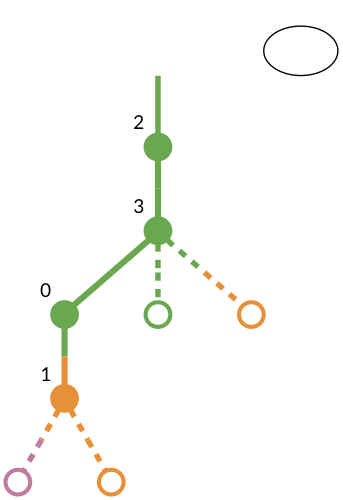

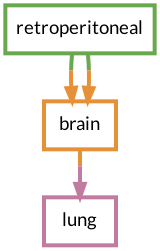

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 7.628
Reg: 3.0
Loss: 60.628
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
"1_brain" [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=soli

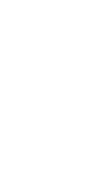

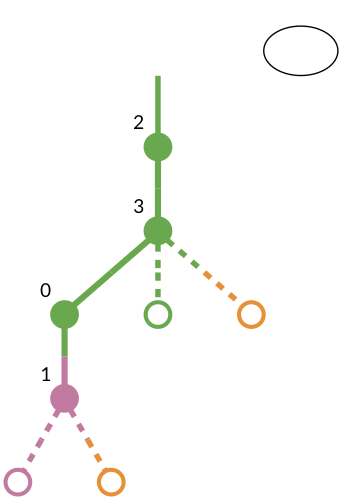

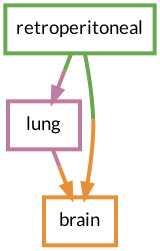

----------------------------------------------------------------------------------------------------



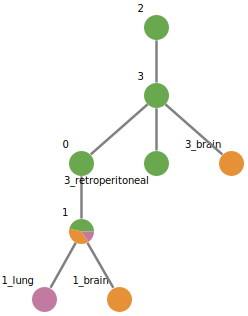

TREE 1, llh -41.806767442225926
{2: '2', 0: '0', 1: '1', 3: '3'}
['retroperitoneal', 'lung', 'brain']


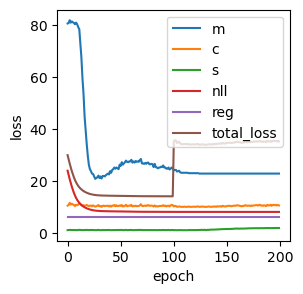

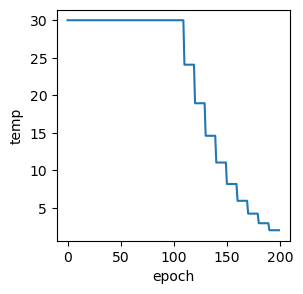

Time elapsed: 17.962409
**************************************** BEST TREE LABELING ****************************************

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 8.04
Reg: 3.000000238418579
Loss: 45.04
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
3 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth

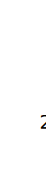

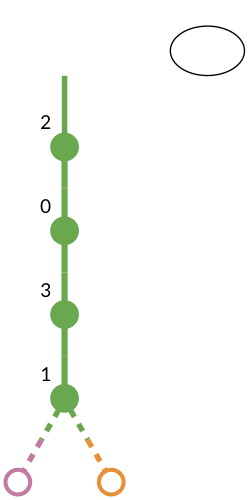

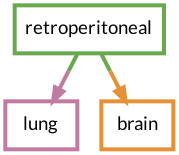

----------------------------------------------------------------------------------------------------

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 8.032
Reg: 3.000000238418579
Loss: 46.032
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
3 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, styl

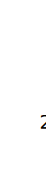

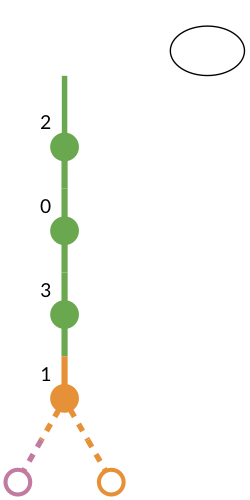

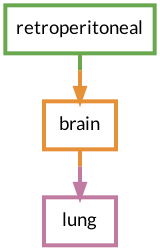

----------------------------------------------------------------------------------------------------

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 8.041
Reg: 3.0
Loss: 46.041
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
3 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabe

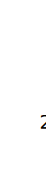

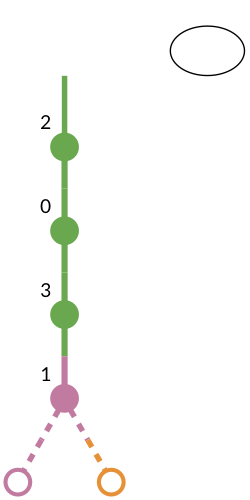

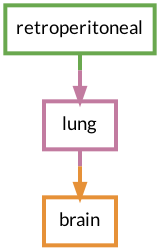

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 8.043
Reg: 2.999999761581421
Loss: 55.043
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
3 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, styl

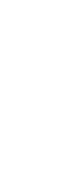

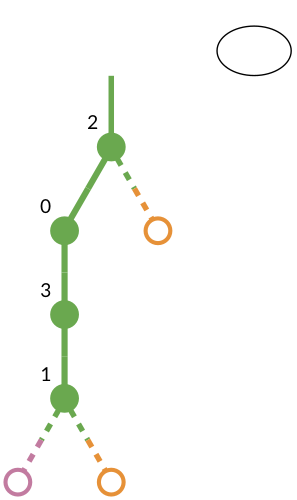

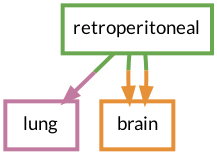

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 8.04
Reg: 3.000000238418579
Loss: 56.04
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
3 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=

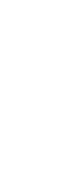

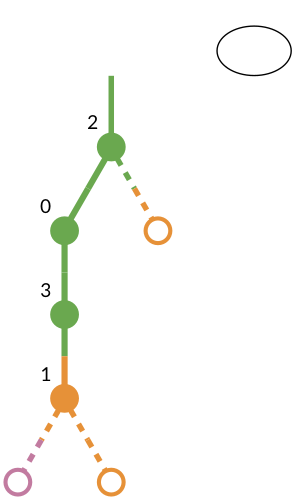

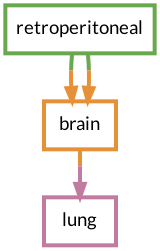

----------------------------------------------------------------------------------------------------



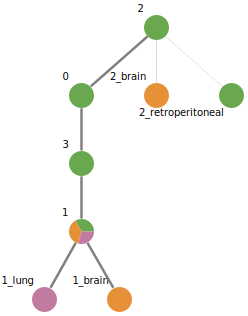

TREE 2, llh -43.58825616575089
{2: '2', 0: '0', 1: '1', 3: '3'}
['retroperitoneal', 'lung', 'brain']


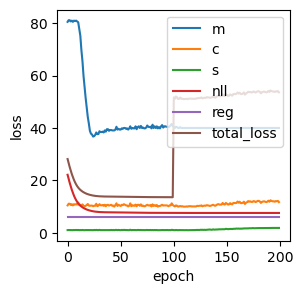

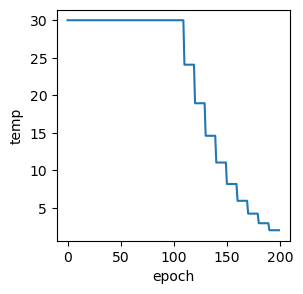

Time elapsed: 18.305944
**************************************** BEST TREE LABELING ****************************************

Migration number: 4.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 7.575
Reg: 3.0
Loss: 64.575
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
"1_brain" [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, 

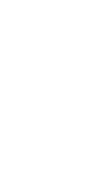

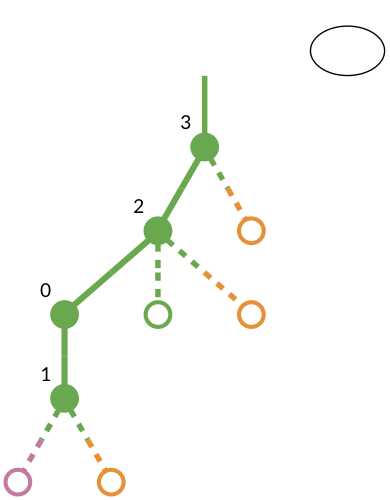

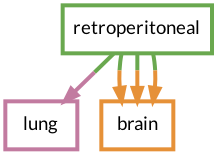

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 7.584
Reg: 3.0
Loss: 64.584
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
"1_brain" [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=soli

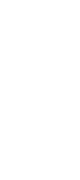

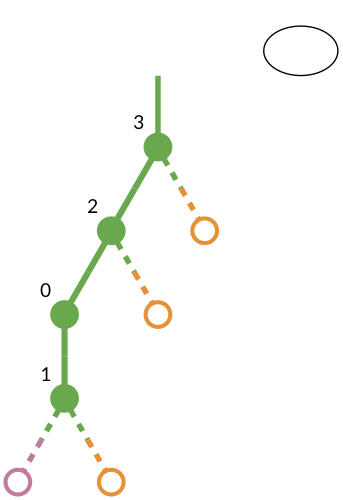

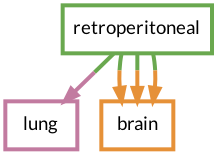

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 7.567
Reg: 3.000000238418579
Loss: 65.567
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
"1_brain" [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circ

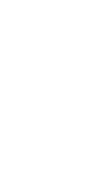

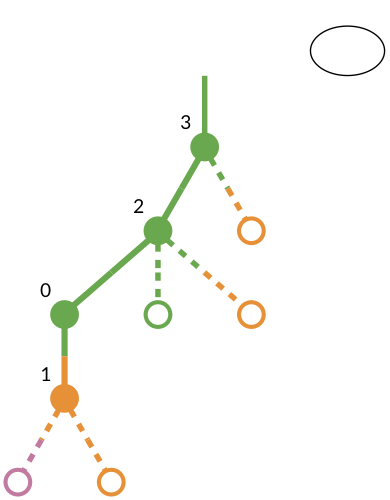

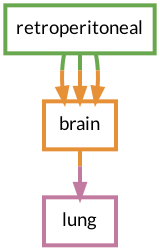

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 7.567
Reg: 3.0
Loss: 70.567
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
"1_brain" [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=soli

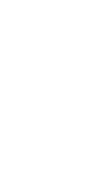

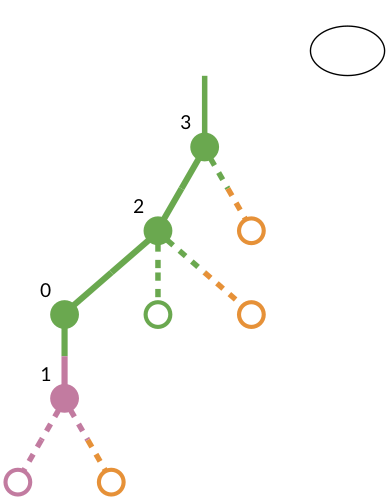

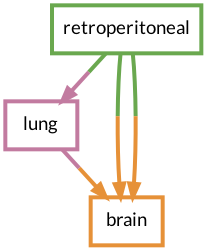

----------------------------------------------------------------------------------------------------



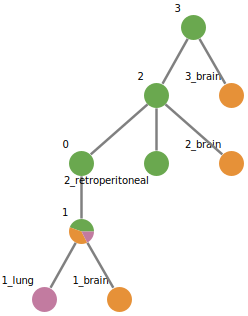

TREE 3, llh -44.49381878029129
{2: '2', 0: '0', 1: '1', 3: '3'}
['retroperitoneal', 'lung', 'brain']


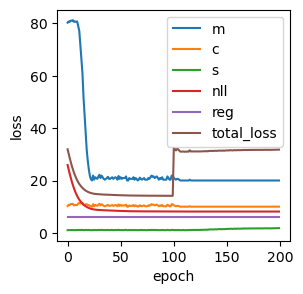

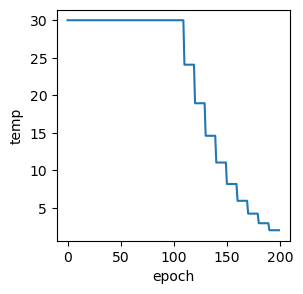

Time elapsed: 18.278211
**************************************** BEST TREE LABELING ****************************************

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 8.117
Reg: 3.0
Loss: 45.117
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
3 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=ci

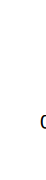

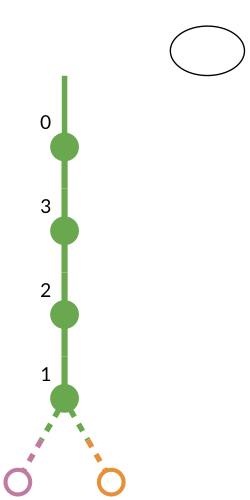

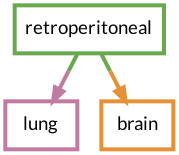

----------------------------------------------------------------------------------------------------

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 8.106
Reg: 3.0
Loss: 46.106
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
3 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabe

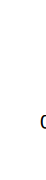

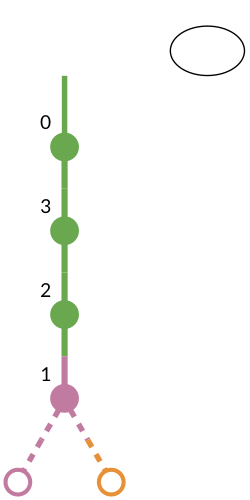

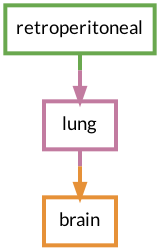

----------------------------------------------------------------------------------------------------

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 8.111
Reg: 3.0
Loss: 46.111
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
3 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabe

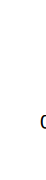

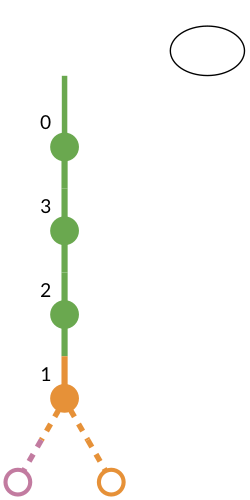

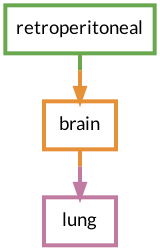

----------------------------------------------------------------------------------------------------



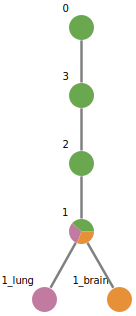

TREE 4, llh -44.693618240487936
{2: '2', 0: '0', 1: '1', 3: '3'}
['retroperitoneal', 'lung', 'brain']


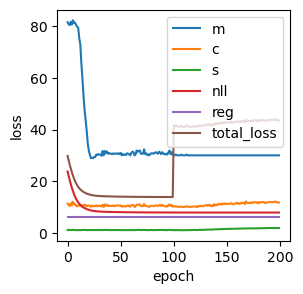

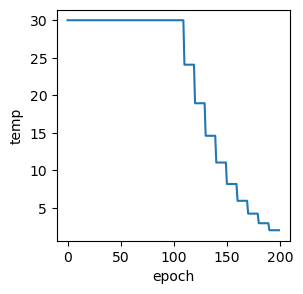

Time elapsed: 17.217776
**************************************** BEST TREE LABELING ****************************************

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 7.83
Reg: 3.0
Loss: 54.83
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
2 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=2];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circ

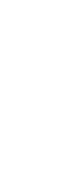

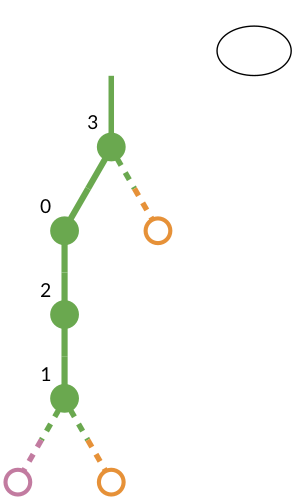

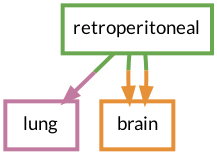

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 7.827
Reg: 3.0
Loss: 55.827
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
2 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=2];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabe

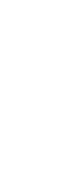

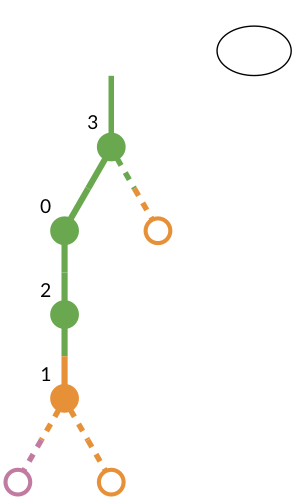

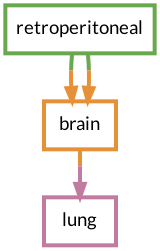

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 7.839
Reg: 3.000000238418579
Loss: 55.839
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
2 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=2];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, styl

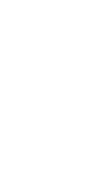

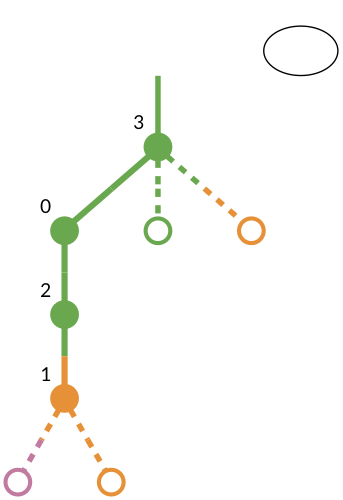

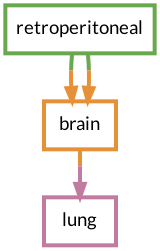

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 7.827
Reg: 3.000000238418579
Loss: 60.827
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
2 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=2];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, styl

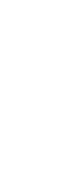

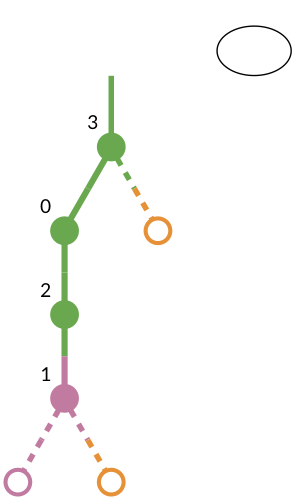

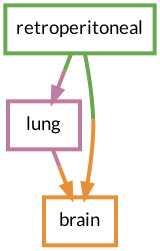

----------------------------------------------------------------------------------------------------



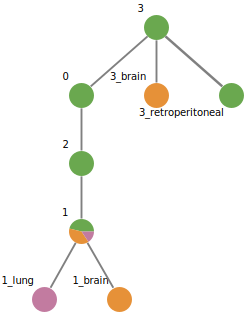

TREE 5, llh -45.31503060732446
{2: '2', 0: '0', 1: '1', 3: '3'}
['retroperitoneal', 'lung', 'brain']


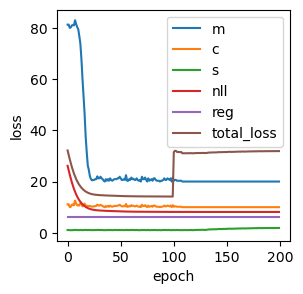

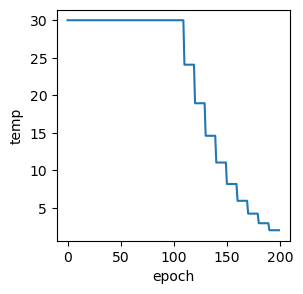

Time elapsed: 17.392346
**************************************** BEST TREE LABELING ****************************************

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 8.116
Reg: 3.0
Loss: 45.116
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
2 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=2];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=ci

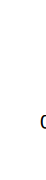

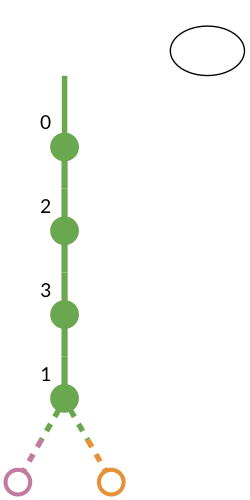

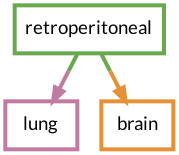

----------------------------------------------------------------------------------------------------

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 8.11
Reg: 3.0
Loss: 46.11
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
2 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=2];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=

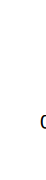

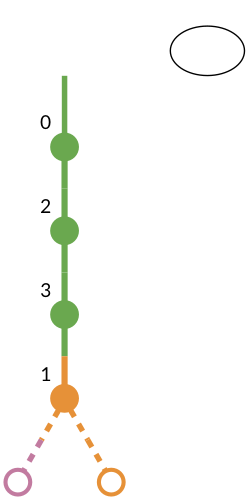

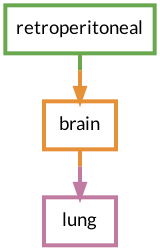

----------------------------------------------------------------------------------------------------

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 8.115
Reg: 3.000000238418579
Loss: 46.115
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
2 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=2];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, styl

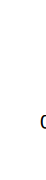

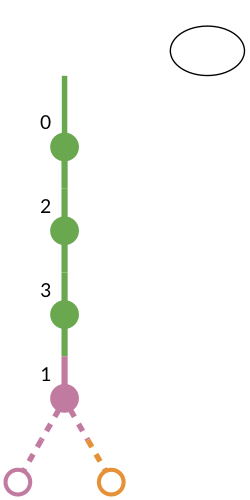

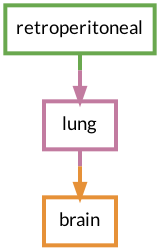

----------------------------------------------------------------------------------------------------



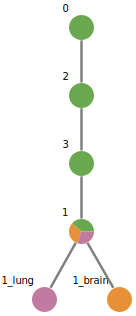

TREE 6, llh -45.62241900815088
{2: '2', 0: '0', 1: '1', 3: '3'}
['retroperitoneal', 'lung', 'brain']


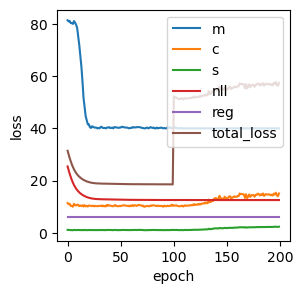

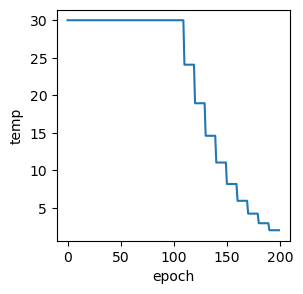

Time elapsed: 17.856588
**************************************** BEST TREE LABELING ****************************************

Migration number: 4.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 12.553
Reg: 3.000000476837158
Loss: 69.553
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
3 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwi

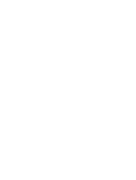

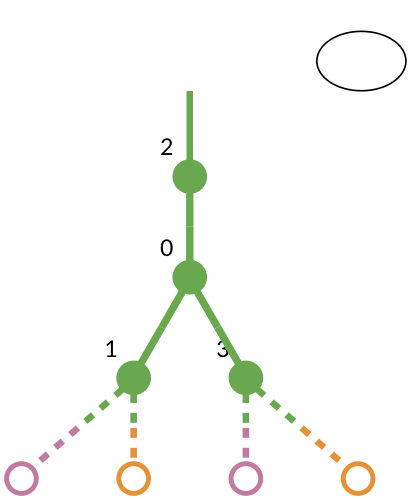

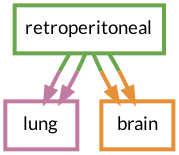

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 12.535
Reg: 3.0
Loss: 70.535
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
3 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlab

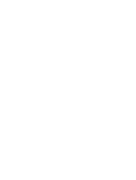

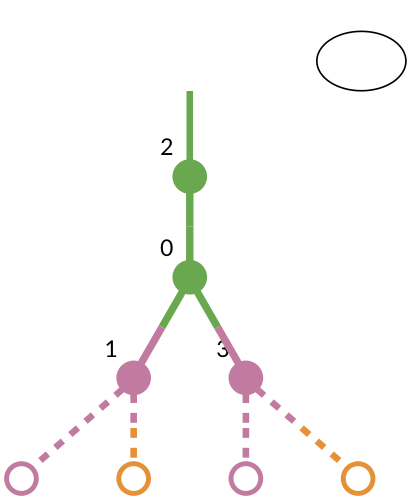

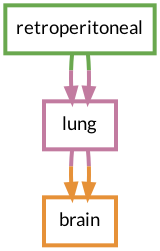

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 12.545
Reg: 3.0
Loss: 70.545
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
3 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlab

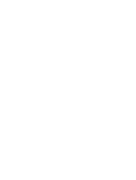

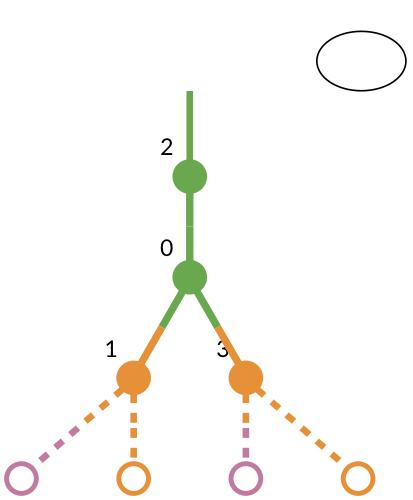

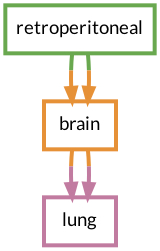

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 12.537
Reg: 2.999999761581421
Loss: 75.537
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
3 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, sty

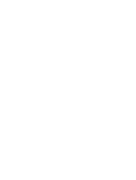

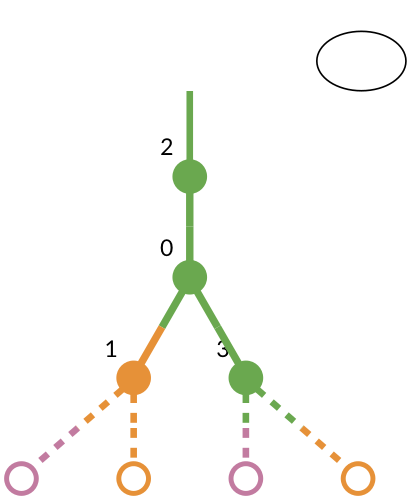

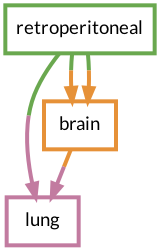

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 12.54
Reg: 3.000000476837158
Loss: 75.54
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
3 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style

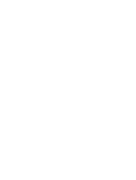

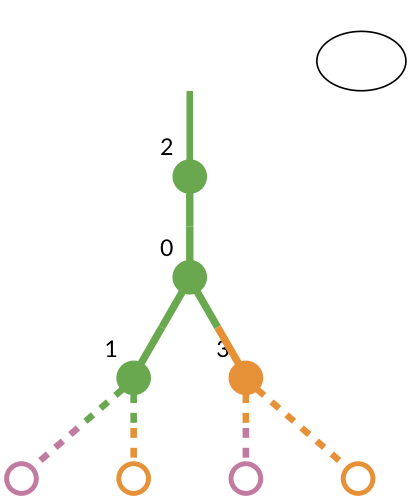

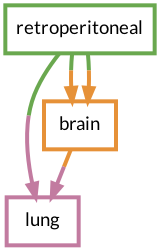

----------------------------------------------------------------------------------------------------



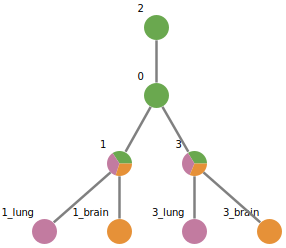

TREE 7, llh -47.302060617305884
{2: '2', 0: '0', 1: '1', 3: '3'}
['retroperitoneal', 'lung', 'brain']


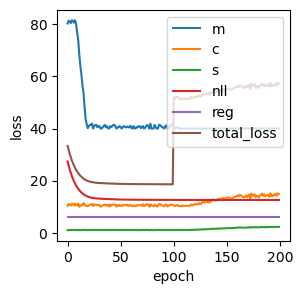

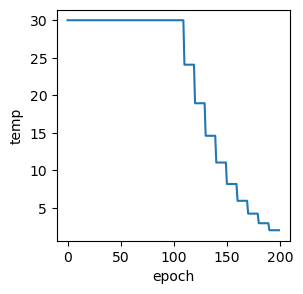

Time elapsed: 17.492141
**************************************** BEST TREE LABELING ****************************************

Migration number: 4.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 12.603
Reg: 3.000000476837158
Loss: 69.603
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
2 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=2];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwi

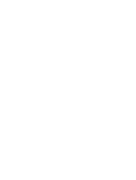

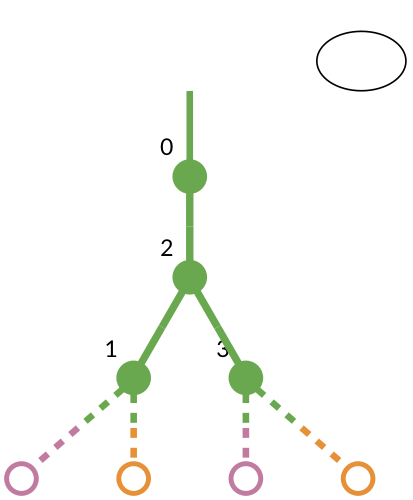

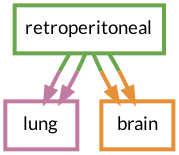

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 12.586
Reg: 2.999999761581421
Loss: 70.586
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
2 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=2];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, sty

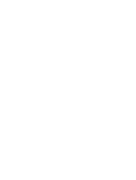

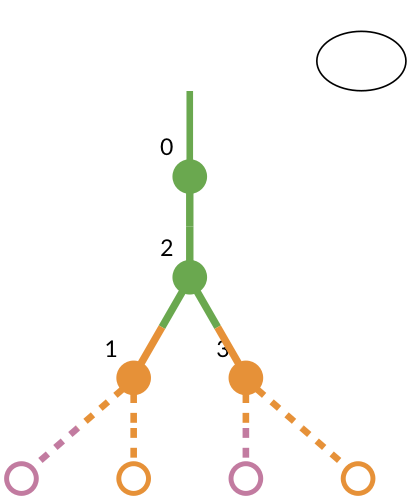

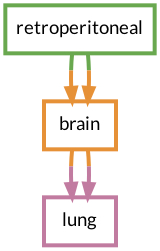

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 12.593
Reg: 3.0
Loss: 70.593
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
2 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=2];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlab

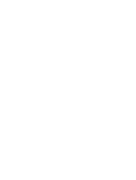

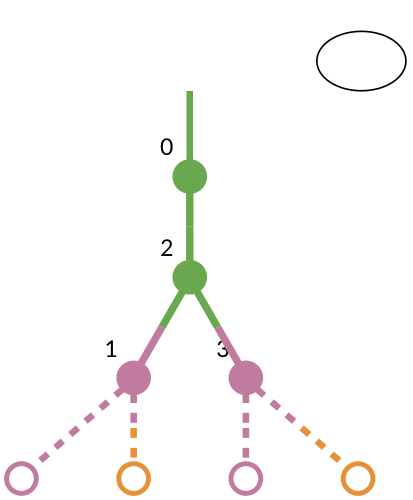

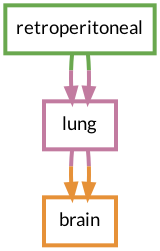

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 12.593
Reg: 3.000000238418579
Loss: 75.593
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
2 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=2];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, sty

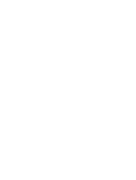

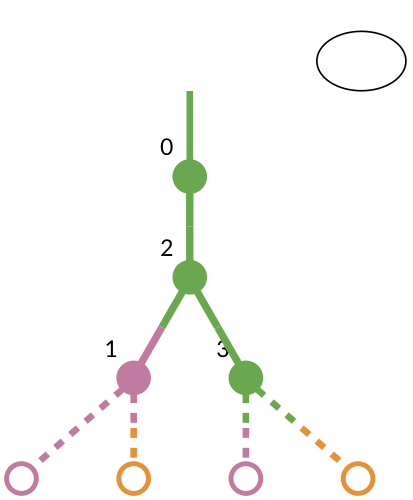

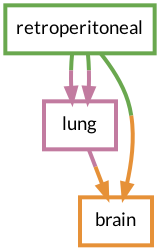

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 12.598
Reg: 3.0
Loss: 75.598
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
2 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=2];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlab

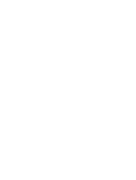

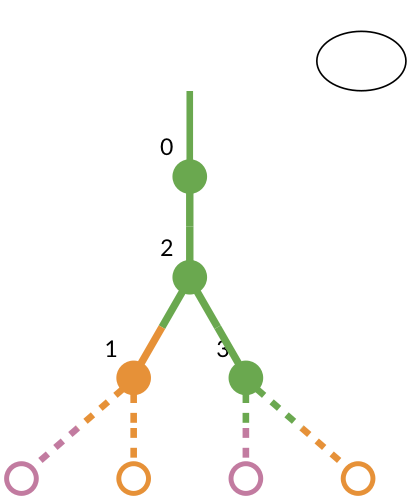

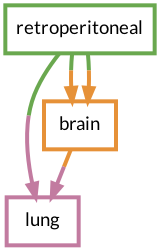

----------------------------------------------------------------------------------------------------



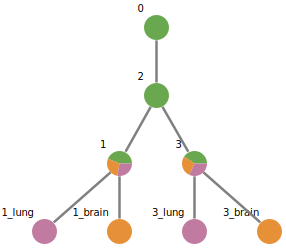

TREE 8, llh -49.09436332009258
{2: '2', 0: '0', 1: '1', 3: '3'}
['retroperitoneal', 'lung', 'brain']


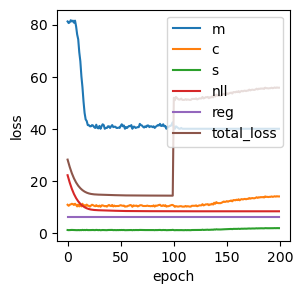

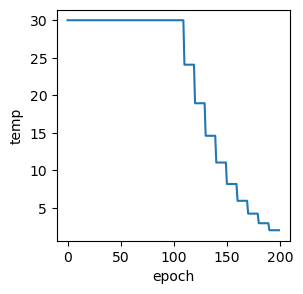

Time elapsed: 17.523139
**************************************** BEST TREE LABELING ****************************************

Migration number: 4.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 8.265
Reg: 3.0
Loss: 65.265
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
"0_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, s

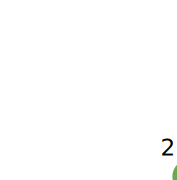

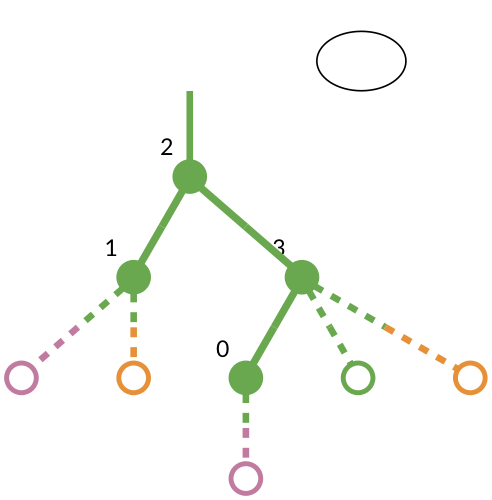

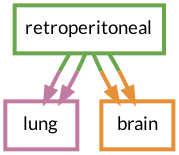

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 8.259
Reg: 3.0
Loss: 71.259
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
"0_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid

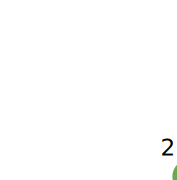

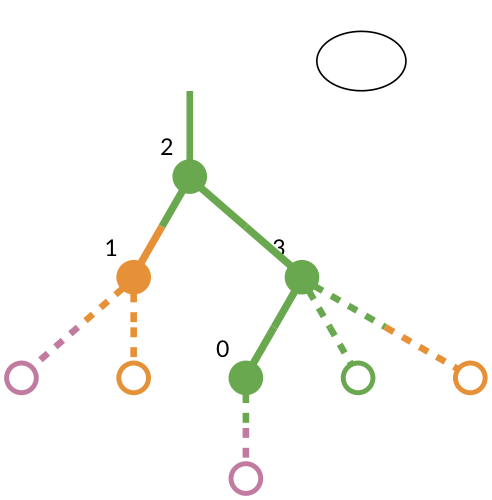

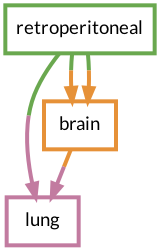

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 8.262
Reg: 3.0
Loss: 71.262
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
"0_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid

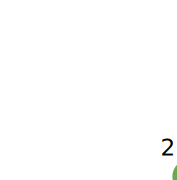

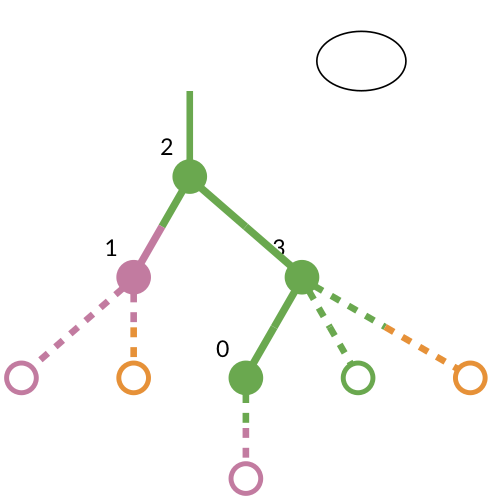

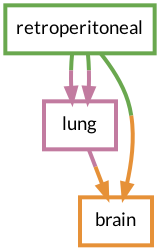

----------------------------------------------------------------------------------------------------



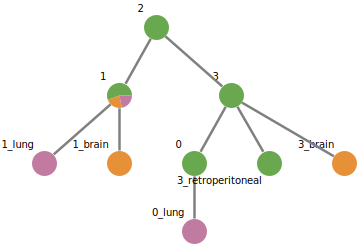

TREE 9, llh -49.17684376174053
{2: '2', 0: '0', 1: '1', 3: '3'}
['retroperitoneal', 'lung', 'brain']


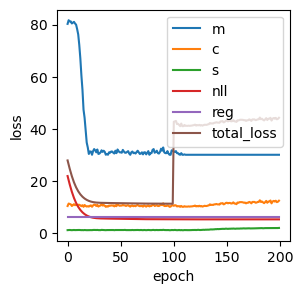

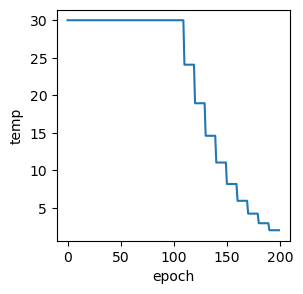

Time elapsed: 17.48528
**************************************** BEST TREE LABELING ****************************************

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 5.165
Reg: 2.999999761581421
Loss: 52.165
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
"0_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", 

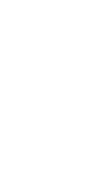

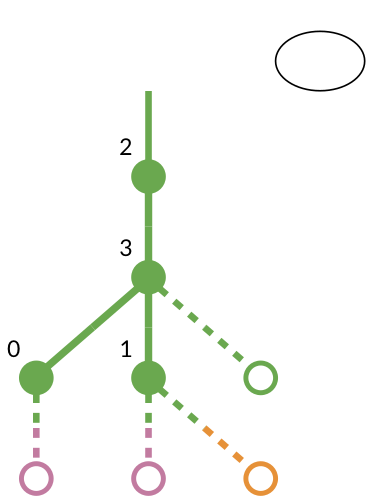

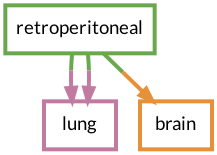

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 5.157
Reg: 2.999999761581421
Loss: 53.157
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
"0_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circl

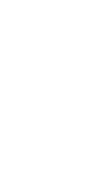

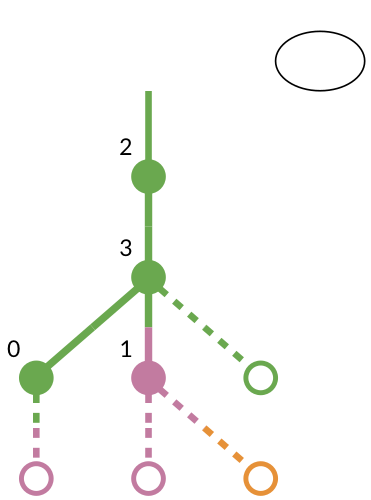

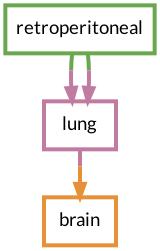

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 5.18
Reg: 3.0
Loss: 53.18
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
"0_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, 

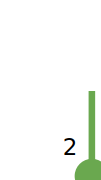

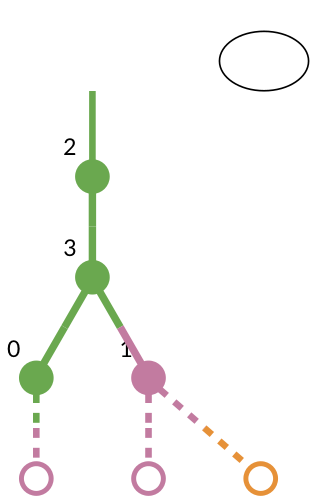

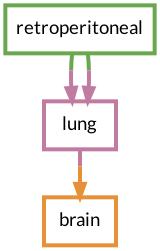

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 5.161
Reg: 3.0
Loss: 58.161
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
"0_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid

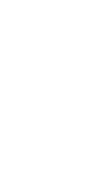

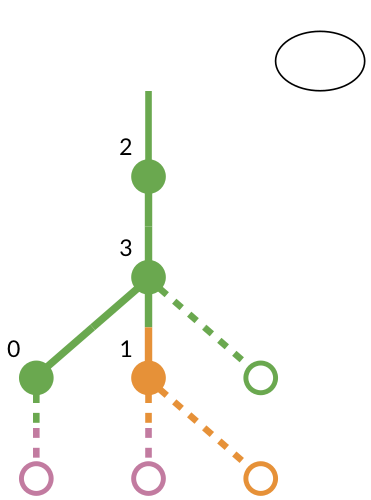

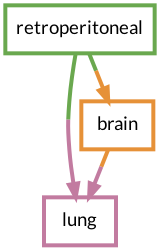

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 5.176
Reg: 3.000000238418579
Loss: 58.176
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
"0_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circl

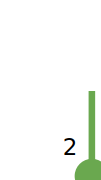

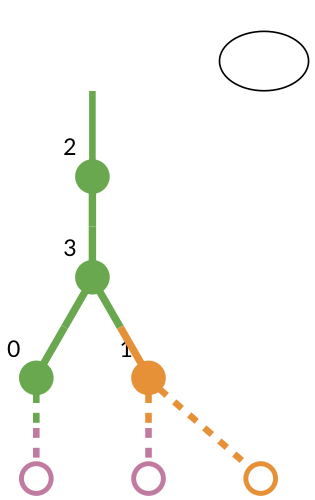

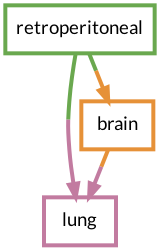

----------------------------------------------------------------------------------------------------



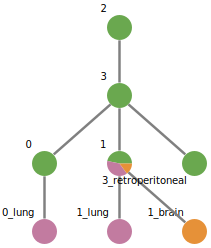

TREE 10, llh -48.81611858474551
{2: '2', 0: '0', 1: '1', 3: '3'}
['retroperitoneal', 'lung', 'brain']


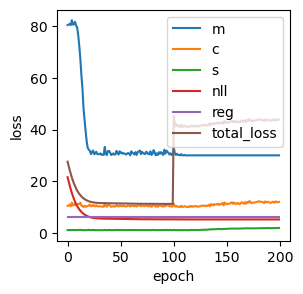

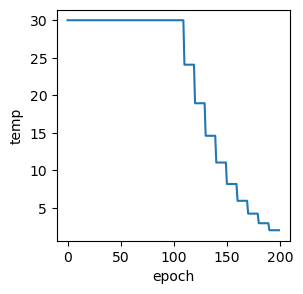

Time elapsed: 17.099271
**************************************** BEST TREE LABELING ****************************************

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 5.159
Reg: 3.0
Loss: 52.159
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
"0_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, s

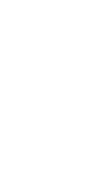

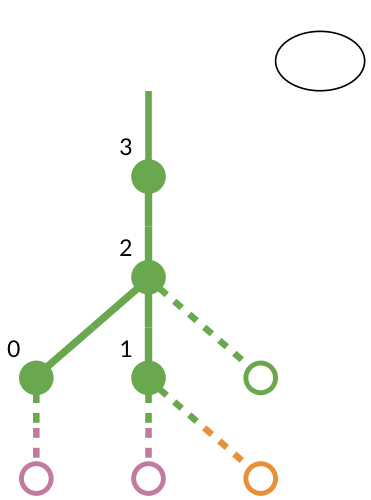

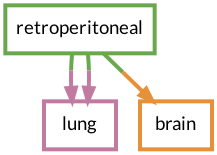

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 5.153
Reg: 3.0
Loss: 53.153
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
"0_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid

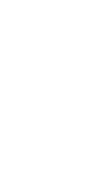

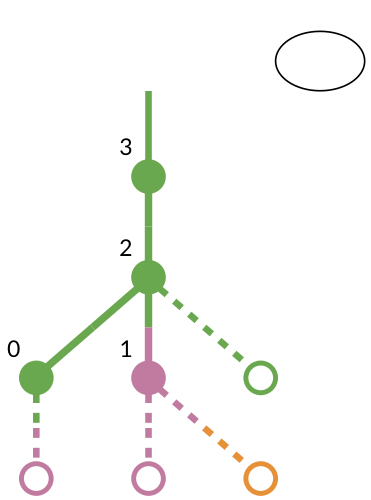

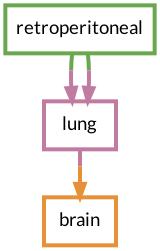

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 5.174
Reg: 3.0
Loss: 53.174
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
"0_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid

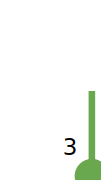

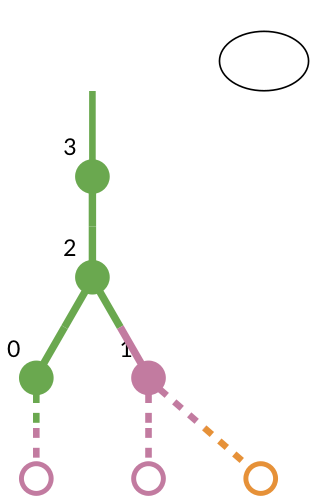

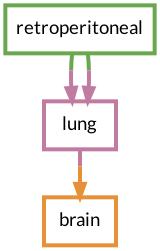

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 5.156
Reg: 3.0
Loss: 58.156
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
"0_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid

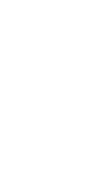

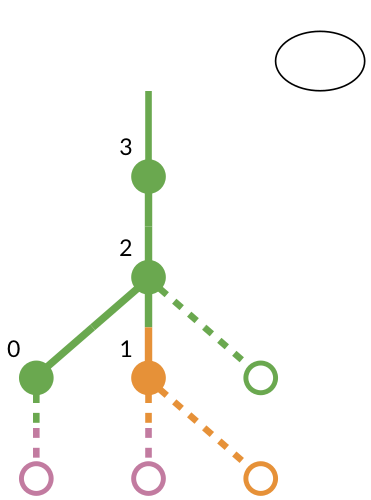

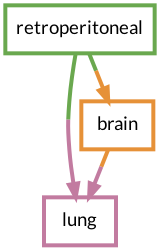

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 5.171
Reg: 2.999999761581421
Loss: 58.171
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
"0_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabel=""];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circl

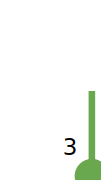

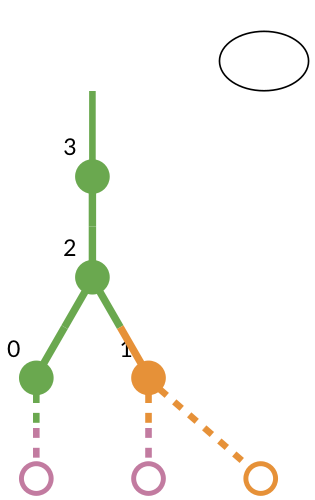

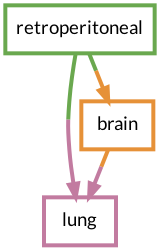

----------------------------------------------------------------------------------------------------



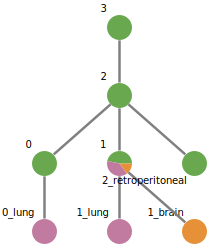

TREE 11, llh -49.954111610110104
{2: '2', 0: '0', 1: '1', 3: '3'}
['retroperitoneal', 'lung', 'brain']


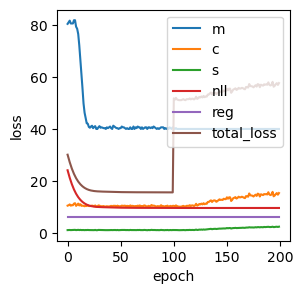

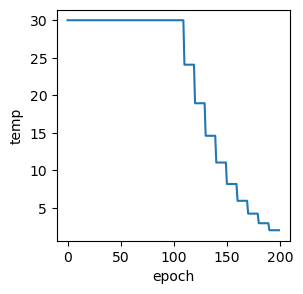

Time elapsed: 17.439448
**************************************** BEST TREE LABELING ****************************************

Migration number: 4.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 9.572
Reg: 2.999999761581421
Loss: 66.572
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
3 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwid

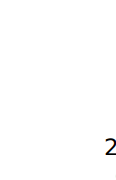

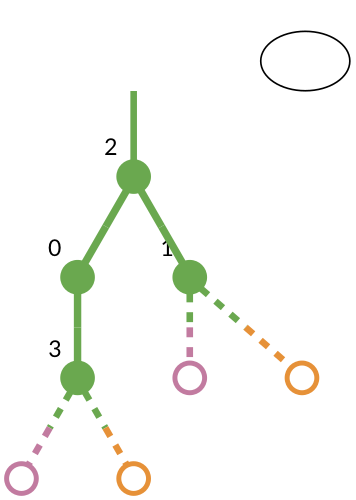

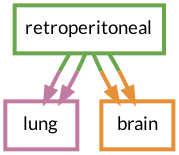

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 9.555
Reg: 2.999999523162842
Loss: 67.555
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
3 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, styl

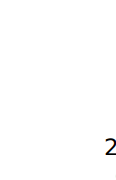

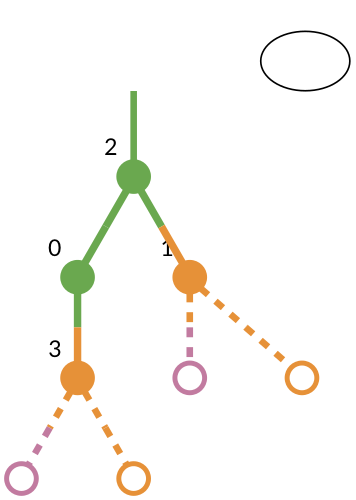

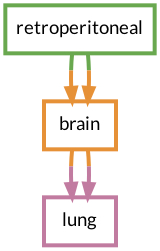

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 9.557
Reg: 3.0
Loss: 67.557
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
3 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
1 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabe

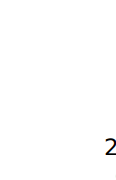

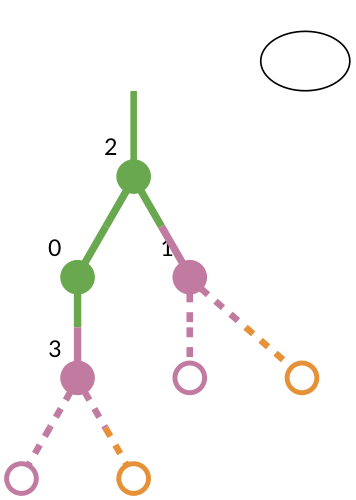

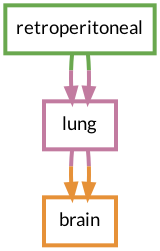

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 9.553
Reg: 3.000000238418579
Loss: 72.553
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
3 [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
1 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, styl

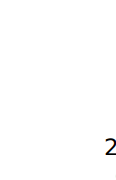

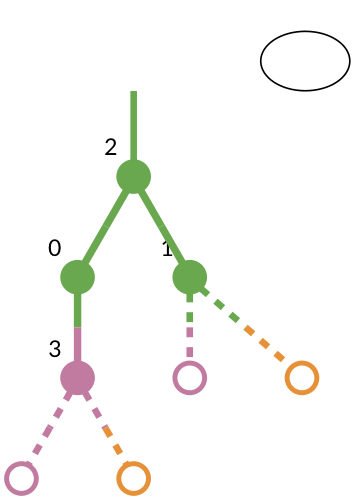

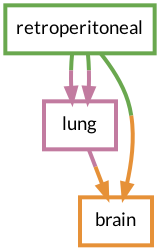

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 9.562
Reg: 3.0
Loss: 72.562
strict digraph  {
graph[splines=false]; nodesep=0.7; ranksep=0.6; forcelabels=true; dpi=200; size=2.5;
0 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=0];
3 [color="#6aa84fff", fillcolor="#6aa84fff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=3];
1 [color="#e69138ff", fillcolor="#e69138ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=filled, xlabel=1];
"1_lung" [color="#c27ba0ff", fillcolor="#c27ba0ff", fixedsize=true, fontname=Lato, fontsize="14pt", height="0.25", label="", penwidth=3, shape=circle, style=solid, xlabe

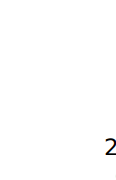

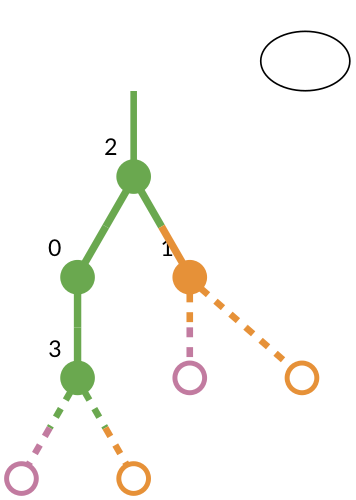

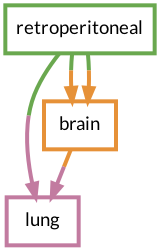

----------------------------------------------------------------------------------------------------



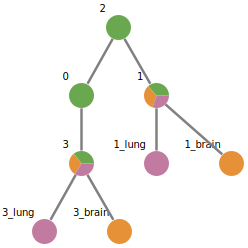

In [3]:
patient = "H132374"
primary_site = "retroperitoneal"
find_labeling(os.path.join(GUNDEM_DATA_DIR, f"{patient}_SNVs.tsv"), 
              os.path.join(PAIRTREE_TREES_DIR, f"patient{patient}.results.npz"),
              custom_colors, primary_site)


In [4]:
patient = "H103207"
primary_site = "left adrenal"
find_labeling(os.path.join(GUNDEM_DATA_DIR, f"{patient}_SNVs.tsv"), 
              os.path.join(PAIRTREE_TREES_DIR, f"patient{patient}.results.npz"),
              custom_colors, primary_site)
                                                                                 

num trees: 3
TREE 0, llh -25.773090877733544
{3: '3', 2: '2', 1: '1', 0: '0'}
['left adrenal', 'brain, right frontal', 'brain, cerebellum', 'left lung lower lobe', 'liver', 'right lung lower lobe']


AssertionError: 